<a href="https://colab.research.google.com/github/Its-anushka/Machine-learning/blob/main/Linear_Regression_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

##**Simple Linear Regression**

In [ ]:
data = [[2600, 550000], [3000, 565000], [3200, 610000], [3600, 680000], [4000, 725000]]
df = pd.DataFrame(data, columns=['area', 'price'])
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

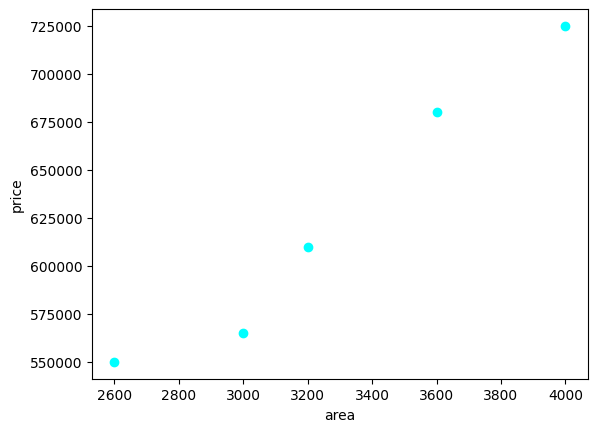

In [ ]:
plt.scatter(df.area, df.price, color='cyan', marker='o')
plt.xlabel('area')
plt.ylabel('price')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

np.float64(180616.43835616432)

In [ ]:
reg.n_features_in_

1

In [ ]:
reg.feature_names_in_

array(['area'], dtype=object)

In [ ]:
reg.predict([[4200]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([750924.65753425])

In [ ]:
df1 = pd.DataFrame([1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300], columns = ['area'])
prices = reg.predict(df1)
df1['prices'] = prices
df1

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836
5,4560,799808.219178
6,5490,926090.753425
7,3460,650441.780822
8,4750,825607.876712
9,2300,492928.082192


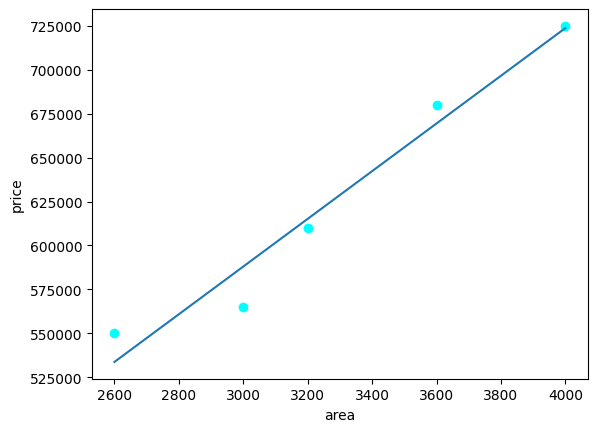

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='cyan', marker='o')
plt.plot(df.area, reg.predict(df[['area']]))

In [ ]:
data = pd.read_csv("canada_per_capita_income.csv")
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
linreg = linear_model.LinearRegression()

In [ ]:
data.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [ ]:
linreg.fit(data[['year']], data['per capita income (US$)'])

LinearRegression()

In [ ]:
linreg.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

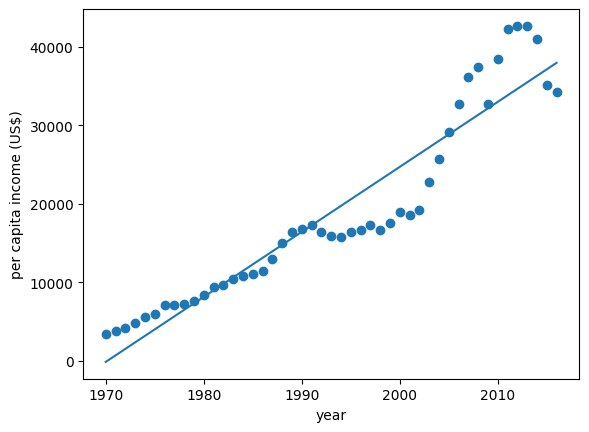

In [ ]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(data['year'], data['per capita income (US$)'])
plt.plot(data['year'], linreg.predict(data[['year']]))

##**Multivariate Regression**

In [ ]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.isnull().sum()

,0
experience,0
test_score(out of 10),0
interview_score(out of 10),0
salary($),0


In [ ]:
df['experience'].fillna('zero', inplace = True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace = True)

In [ ]:
!pip install word2number
from word2number import w2n

In [ ]:
df['test_score(out of 10)']

,test_score(out of 10)
0,8.000000
1,8.000000
2,6.000000
3,10.000000
4,9.000000
5,7.000000
6,7.857143
7,7.000000


In [ ]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

,experience
0,0
1,0
2,5
3,2
4,7
5,3
6,10
7,11


In [ ]:
multi = linear_model.LinearRegression()
multi.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [ ]:
multi.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [ ]:
multi.intercept_

np.float64(17237.330313727172)

In [ ]:
multi.feature_names_in_

array(['experience', 'test_score(out of 10)',
       'interview_score(out of 10)'], dtype=object)

In [ ]:
multi.n_features_in_

3

In [ ]:
multi.predict([[2, 9, 6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [ ]:
multi.predict([[12, 10, 10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

##**Gradient Descent**

In [ ]:
data = pd.read_csv("test_scores.csv")
data

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
def gradient_descent(x, y):
  m_curr = b_curr = 0
  iterations = 1000
  n = len(x)
  learning_rate = 0.001

  for i in range(iterations):
    y_predicted = m_curr*x + b_curr
    cost = 1/n * sum([i**2 for i in (y - y_predicted)])
    md = -(2/n)*sum(x*(y-y_predicted))
    bd = -(2/n)*sum(y-y_predicted)
    m_curr = m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd
    print("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

gradient_descent(data['math'], data['cs'])


In [ ]:
import pickle

with open("model", "wb") as f:
  pickle.dump(reg, f)


In [ ]:
with open("model", "rb") as f:
  reg = pickle.load(f)

reg.predict([[3200]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615136.98630137])

##**Encoding and Dummy Variables**

In [ ]:
home = pd.read_csv('homeprices.csv')
home

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


**Pandas' get_dummies**

In [ ]:
home = pd.concat([home, pd.get_dummies(home.town, dtype = int)], axis = 1)

In [ ]:
home = home.drop(['town', 'west windsor'], axis = 1)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
X = home.drop('price', axis = 1)
Y = home.price

In [ ]:
model.fit(X, Y)

LinearRegression()

**Sklearn.preprocessing -> LabelEncoder**

In [ ]:
home1 = pd.read_csv('homeprices.csv')
home1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
home1['town'] = le.fit_transform(home1['town'])
home1.head()

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000


**Sklearn.preprocessing -> OneHotEncoder**

The OneHotEncoder in scikit-learn, by default, returns a sparse matrix to save memory when dealing with high-dimensional categorical data. This sparse matrix is not directly compatible with some operations that expect dense matrices, such as those performed by ColumnTransformer. The error is arising because the ColumnTransformer is expecting a dense input matrix, but it's receiving a sparse matrix after the OneHotEncoder is applied.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder(categories = 0)

In [ ]:
X = home1[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
ct = ColumnTransformer([("town", OneHotEncoder(sparse_output= False), [0])], remainder = 'passthrough')

In [ ]:
ct.fit_transform(X)

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

###**Car Prices**

In [ ]:
cars = pd.read_csv("carprices.csv")
cars

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
cars = pd.concat([cars, pd.get_dummies(cars['Car Model'], dtype = int)], axis = 1)
cars

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
cars = cars.drop(['Car Model', 'Mercedez Benz C class'], axis = 1)
cars.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [ ]:
model = linear_model.LinearRegression()
X = cars.drop(['Sell Price($)'], axis = 1)
y = cars['Sell Price($)']

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.predict([[45000, 4, 0, 0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [ ]:
model.predict([[86000, 7, 0, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [ ]:
model.score(X, y)

0.9417050937281082